# Método de la matriz inversa para la regresión lineal

$$Ax=b$$

$$A^TAx = A^Tb$$

$$x = (A^TA)^{-1}A^Tb$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)

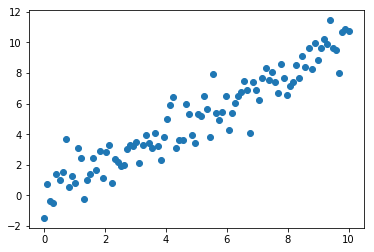

In [3]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")

In [5]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [6]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [7]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = session.run(solution)

In [8]:
solution_eval

array([[0.99395256],
       [0.10398204]])

In [11]:
slope = solution_eval[0][0]
intercept = solution_eval[1][0]
print(str(np.round(slope,3))+"x+"+str(np.round(intercept,3)))

0.994x+0.104


In [12]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

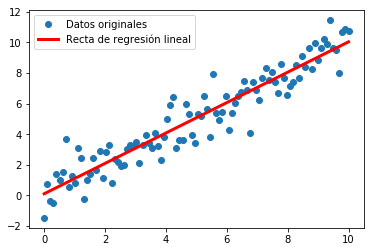

In [13]:
plt.plot(x_vals, y_vals, 'o', label = "Datos originales")
plt.plot(x_vals, best_fit, 'r-', label = "Recta de regresión lineal", linewidth = 3)
plt.legend(loc = "upper left")
plt.show()

# Método de la descomposición de Cholesky

$$A = LU$$
- $L$: matriz triangular superior
- $U$: matriz triangular inferior
- $L^T=U$

$$Ax=b$$

$$A^TAx=A^Tb$$

$$LUx=A^Tb$$

$$Ly=A^Tb$$
$$Ux=y$$

In [23]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [24]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [25]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b_tensor)
y_sol = tf.matrix_solve(L, tA_b)
x_sol = tf.matrix_solve(tf.transpose(L), y_sol)

In [26]:
sol_eval = session.run(x_sol)

In [27]:
sol_eval

array([[0.99395256],
       [0.10398204]])

In [29]:
slope = sol_eval[0][0]
intercept = sol_eval[1][0]
print(str(np.round(slope, 3))+"x+"+str(np.round(intercept,3)))

0.994x+0.104


In [30]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

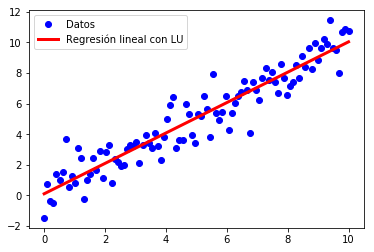

In [31]:
plt.plot(x_vals, y_vals, 'bo', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label = "Regresión lineal con LU", linewidth = 3)
plt.legend(loc="upper left")
plt.show()